In [2]:
# from bs4 import BeautifulSoup
# import requests

In [3]:
# def get_url(genre, start):
#     return f"https://www.imdb.com/search/title/?title_type=feature&genres={genre}&start={start}&explore=genres&ref_=adv_nxt"

# genres = ["action", "adventure", "animation", "biography", "comedy", "crime", "documentary", "drama", "family", "fantasy",\
#         "film-noir", "history", "horror", "music", "musical", "mystery", "romance", "sci-fi", "short", "sport",\
#         "superhero", "thriller", "war", "western"]

In [6]:
# requests.get(get_url("animation", 0)).text

True

# Parsing routine

In [33]:
#!git clone https://github.com/JohnDoee/imdbparser.git
from imdbparser.imdbparser import IMDb
import requests

from pathlib import Path
from tqdm import tqdm
import json

import pandas as pd

In [2]:
data_dir = Path("data")
if not data_dir.exists(): data_dir.mkdir()
imgs_dir = data_dir / "imgs"
if not imgs_dir.exists(): imgs_dir.mkdir()

In [42]:
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
            "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery",
            "Romance", "Sci-Fi", "Short", "Sport", "Superhero", "Thriller", "War", "Western"]
# genres = 

if (data_dir / "movie_info.csv").exists():
    results = pd.read_csv(data_dir / "movie_info.csv")
    results["genres"] = results["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
    seen = set(results.imdb_id)
    results = results.to_dict("records")
else:
    results = []
    seen = set()

imdb = IMDb()

for genre in tqdm(genres):
    for year in tqdm(range(2015, 2023)):
        try:
            query = imdb.advanced_search(genres=[genre],  release_date=(year, year + 1))
            query.fetch()
            for movie in query.results:
                movie.imdb_id = movie.imdb_id.lstrip("t")
                if movie.imdb_id in seen: continue
                seen.add(movie.imdb_id)
                movie.fetch()

                results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                                "genres": movie.genres})
                img_data = requests.get(movie.cover).content
                with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                    handler.write(img_data)
        except Exception as e:
            print(e)

# exceptional genres
for year in tqdm(range(1950, 1959)):
    try:
        query = imdb.advanced_search(genres=["Film-Noir"],  release_date=(year, year + 1))
        query.fetch()
        for movie in query.results:
            movie.imdb_id = movie.imdb_id.lstrip("t")
            if movie.imdb_id in seen: continue
            seen.add(movie.imdb_id)
            movie.fetch()

            results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                            "genres": (movie.genres if "Film-Noir" in movie.genres else movie.genres + ["Film-Noir"])})
            img_data = requests.get(movie.cover).content
            with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                handler.write(img_data)
    except Exception as e:
        print(e)

for year in tqdm(range(2015, 2023)):
    try:
        query = imdb.advanced_search(keywords="Superhero",  release_date=(year, year + 1))
        query.fetch()
        for movie in query.results:
            movie.imdb_id = movie.imdb_id.lstrip("t")
            if movie.imdb_id in seen: 
                idx = 0
                while results[idx]["imdb_id"] != movie.imdb_id: idx += 1
                if "Superhero" not in results[idx]["genres"]:
                    results[idx]["genres"] += ["Superhero"]
                continue
            seen.add(movie.imdb_id)
            movie.fetch()

            results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                            "genres": (movie.genres if "Superhero" in movie.genres else movie.genres + ["Superhero"])})
            img_data = requests.get(movie.cover).content
            with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                handler.write(img_data)
    except Exception as e:
        print(e)

pd.DataFrame(results).to_csv(data_dir / "movie_info.csv", index=False)
len(results)

100%|██████████| 1/1 [08:59<00:00, 539.47s/it]


4702

# Explore

In [43]:
import pandas as pd
import json

In [44]:
data_dir = Path("data")
movies_info = pd.read_csv(data_dir / "movie_info.csv")
movies_info["genres"] = movies_info["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
            "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery",
            "Romance", "Sci-Fi", "Short", "Sport", "Superhero", "Thriller", "War", "Western"]
genres_count = dict.fromkeys(genres, 0)
unique_genres = set()
for _, row in movies_info.iterrows():
    unique_genres |= set(row["genres"])
    for genre in genres_count:
        genres_count[genre] += genre in row["genres"]
print(unique_genres)
genres_count

{'Drama', 'Family', 'Talk-Show', 'Animation', 'War', 'Fantasy', 'Thriller', 'Crime', 'Sci-Fi', 'Documentary', 'Film-Noir', 'News', 'History', 'Game-Show', 'Musical', 'Music', 'Romance', 'Sport', 'Comedy', 'Western', 'Mystery', 'Biography', 'Horror', 'Superhero', 'Adventure', 'Short', 'Reality-TV', 'Action'}


{'Action': 1281,
 'Adventure': 1139,
 'Animation': 581,
 'Biography': 508,
 'Comedy': 1299,
 'Crime': 921,
 'Documentary': 336,
 'Drama': 2754,
 'Family': 575,
 'Fantasy': 891,
 'Film-Noir': 257,
 'History': 455,
 'Horror': 591,
 'Music': 337,
 'Musical': 264,
 'Mystery': 735,
 'Romance': 679,
 'Sci-Fi': 832,
 'Short': 309,
 'Sport': 323,
 'Superhero': 233,
 'Thriller': 1216,
 'War': 311,
 'Western': 333}

In [47]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

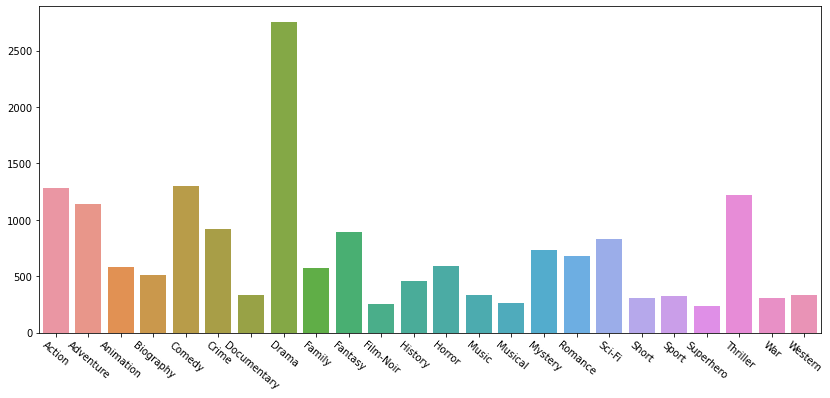

In [58]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=np.array(list(genres_count.keys())), y=np.array(list(genres_count.values())), ax=ax)
plt.xticks(rotation=-40)
plt.show()